<a href="https://colab.research.google.com/github/OtraNerdMas/SegundoTPRedes/blob/master/ReglaDeOja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Entrenamiento

In [0]:
learningRate = 0.1
w_save = []
epsilon = 0.00000001

In [0]:
def train(datos, learningRate, epsilon):
    w = np.random.rand(1, 2) * 2 - 1
    i = 1
    for dato in datos:
      w_save.append(w)
      dato = dato[:, np.newaxis]
      output = np.dot(w, dato)
      
      w_aux = w

      w = w + learningRate * output[0][0] * (dato.T - output[0][0] * w)

      i = i + 1
      
      
      if (abs(np.mean(w_aux - w))  < epsilon):
        print(abs(np.mean(w_aux - w))) 
        return w, i;
      
    return w , len(datos)

In [0]:
def predict(entrada):
  output = np.dot(w, entrada)
  return output

## Algunos datasets

Cuadrado de puntos

In [0]:
datosEjeX = np.random.rand(1, 400) * 2 - 1
datosEjeY = np.random.rand(1, 400) / 1000 - (0.5/1000)
#datosEjeY += datosEjeX
datosCuadrado = []
for i in range(datosEjeX.shape[1]):
  datosCuadrado.append([datosEjeX[0][i], datosEjeY[0][i]])
  
datosCuadrado = np.array(datosCuadrado)

plt.plot(datosCuadrado[:, 0], datosCuadrado[:, 1] , '.')
plt.show()


Datos dos circulos

In [0]:
datosX_1 = np.random.normal(0, 1/5, 1000) + 1
datosY_1 = np.random.normal(0, 1/5, 1000) + 1

datosX_2 = np.random.normal(0, 1/5, 1000) - 1
datosY_2 = np.random.normal(0, 1/5, 1000) - 1

datosX = np.concatenate((datosX_1, datosX_2))
datosY = np.concatenate((datosY_1, datosY_2))

datosCirculos=[]

for i in range(datosX.shape[0]):
  datosCirculos.append([datosX[i], datosY[i]])
  
datosCirculos = np.array(datosCirculos)

plt.plot(datosCirculos[:, 0], datosCirculos[:, 1] , '.')
plt.axis('equal')
plt.show()


## Ejemplos

### Cuadrado

In [17]:
wCuadrado, iCuadrado = train(datosCuadrado, learningRate, epsilon)

3.2814772409970445e-09


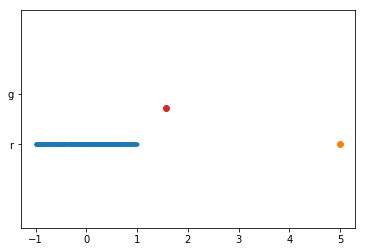

In [19]:
plt.plot(datosCuadrado[:, 0], datosCuadrado[:, 1] , '.')
plt.plot(w[0][0] * 5, wCuadrado[0][1] * 5, 'o', 'r') ##W Entrenado quizas
plt.plot(w_save[0][:, 0] * 2, w_save[0][:, 1] * 2, 'o', 'g') ## I
plt.axis('equal')
plt.show()

### Circulos

In [0]:
wCirculos, iCirculos = train(datosCirculos, learningRate, epsilon)

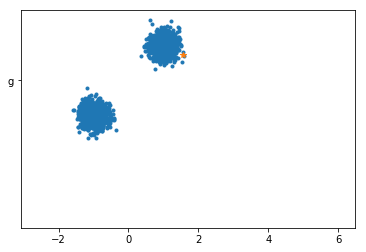

In [25]:
plt.plot(datosCirculos[:, 0], datosCirculos[:, 1] , '.')
plt.plot(w[0][0] * 5, wCirculos[0][1] * 5, '*', 'b') ##W No entrenado quizas
plt.plot(w_save[0][:, 0] * 2, w_save[0][:, 1] * 2, '*', 'g') ## Entrenado
plt.axis('equal')
plt.show()